### Contents
Introduction<br>
The ML Process<br>
Collect the Data<br>
Explore the Data<br>
Understand the Problem<br>
Design the Model<br>
Initialize the Parameters<br>
Make a Prediction<br>
Calculate the Loss<br>
Calculate a Step<br>
Optimize the Parameters<br>
Putting it All Together<br>
A Quadratic Example<br>

In [1]:
import torch
from torch import Tensor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Introduction

In [2]:
X = [float(x) for x in range(-10, 10)]
y = [5*x+9 for x in X]
df = pd.DataFrame(list(zip(X, y)), columns= ['input', 'output'])
df.to_csv('data.csv')

print(X)
print(y)

[-10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
[-41.0, -36.0, -31.0, -26.0, -21.0, -16.0, -11.0, -6.0, -1.0, 4.0, 9.0, 14.0, 19.0, 24.0, 29.0, 34.0, 39.0, 44.0, 49.0, 54.0]


### Collecting the Data

In [3]:
df = pd.read_csv('data.csv')
X = df['input'].to_numpy()
y = df['output'].to_numpy()

print(X)
print(y)

print(type(X))

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]
[-41. -36. -31. -26. -21. -16. -11.  -6.  -1.   4.   9.  14.  19.  24.
  29.  34.  39.  44.  49.  54.]
<class 'numpy.ndarray'>


### Exploring the Data

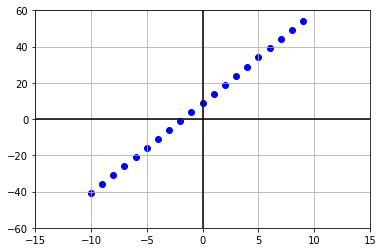

In [4]:
def plot_features_labels(x: np.ndarray, y: np.ndarray, predictions: np.ndarray=None):
    ax = plt.subplots()[1]
    ax.set_ylim(-60, 60)
    ax.set_xlim(-15, 15)
    plt.scatter(x, y, color='blue')
    if predictions:
        ax.scatter(x, predictions, color='red')
    plt.grid(True)
    plt.axhline(color='black')
    plt.axvline(color='black')


plot_features_labels(X, y)

### Design the Model

In [5]:
def linear_equation(x: Tensor, params: Tensor):
    m, b = params
    return m*x + b

In [6]:
y = linear_equation(torch.tensor(X), torch.tensor((5, 9)))

print(y)
print(type(y))

tensor([-41., -36., -31., -26., -21., -16., -11.,  -6.,  -1.,   4.,   9.,  14.,
         19.,  24.,  29.,  34.,  39.,  44.,  49.,  54.], dtype=torch.float64)
<class 'torch.Tensor'>


### Initialize parameters

In [7]:
X = torch.tensor(X)
params = torch.ones(2).requires_grad_()
epochs = 10
lr = 1e-3

print(params)

tensor([1., 1.], requires_grad=True)


### Making a Prediction

In [8]:
predictions = linear_equation(X, params)

### Calculate the Loss

In [9]:

def mse(predictions: Tensor, labels: Tensor) -> Tensor:
    return ((predictions-labels)**2).mean().sqrt()
    
loss = mse(predictions, y)
loss

tensor(23.8328, dtype=torch.float64, grad_fn=<SqrtBackward0>)

### Calculate a Step

In [10]:
loss.backward()
step = lr * params.grad.data
step

tensor([-0.0055, -0.0003])

### Optimize the Parameters

In [11]:
params.data -= step
params.grad = None
params

tensor([1.0055, 1.0003], requires_grad=True)

### Putting it all together

Loss: 23.53501022870547 Parameters: tensor([1.0600, 1.0028])


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

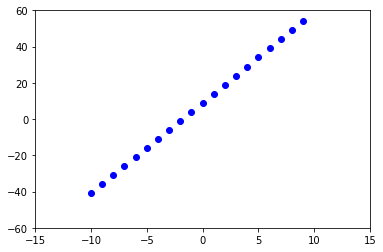

In [12]:
def train(epochs: int, verbose: bool) -> Tensor:
    for epoch in range(epochs):
        predictions = linear_equation(X, params)
        loss = mse(predictions, y)
        loss.backward()
        step = lr * params.grad.data
        params.data -= step
        params.grad = None
        if verbose:
            print(f'Epoch: {epoch+1}  Loss: {loss.item()} Step: {step} Parameters: {params.item()}.')
    return predictions, loss, params


predictions, loss, params = train(epochs, False)
print(f'Loss: {loss.item()} Parameters: {params.data}')

plot_features_labels(X, y, predictions.detach().numpy())

### A Quadratic Example

In [ ]:
def quadratic_equation(x: Tensor, abc: tuple[int]):
    a = abc[0]
    b = abc[1]
    c = abc[2]
    y = a*(x**2) + (b*x) + c
    return y

y = quadratic_equation(X, (1, 70, 90))

y

In [ ]:
def train(epochs: int, verbose: bool) -> Tensor:
    for epoch in range(epochs):
        predictions = quadratic_equation(X, params)
        loss = mse(predictions, y)
        loss.backward()
        step = lr * params.grad.data
        params.data -= step
        params.grad = None
        if verbose:
            print(f'Epoch: {epoch+1}  Loss: {loss.item()} Step: {step} Parameters: {params.item()}.')
    return predictions, loss, params


predictions, loss, params = train(epochs, False)
print(f'Loss: {loss.item()} Parameters: {params.data}')

plot_features_labels_preds(X, y, predictions.detach().numpy())